In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from scipy.stats import hypergeom

In [0]:
bin1 = open("biod_bin1_genes.txt", 'r')
bin2 = open("biod_bin2_genes.txt", 'r')
bin3 = open("biod_bin3_genes.txt", 'r')
bin4 = open("biod_bin4_genes.txt", 'r')
bin10 = open("biod_bin10_genes.txt", 'r')

gene = ''
pathways = []
gene_pathway = pd.DataFrame()

for line in bin1:
  if "RPA" in line:
    gene = line.split('\n')[0]
  elif line != '\n':
    pathway = ' '.join(line.split(' - ')[0].split(' ')[1:])
    pathway_identifier = ''.join(line.split(' - ')[0].split(' ')[0])
    gene_pathway = gene_pathway.append(pd.DataFrame([[1, gene, pathway, pathway_identifier]], columns=['bin','gene','pathway','pathway_identifier']), ignore_index=True)
for line in bin2:
  if "RPA" in line:
    gene = line.split('\n')[0]
  elif line != '\n':
    pathway = ' '.join(line.split(' - ')[0].split(' ')[1:])
    pathway_identifier = ''.join(line.split(' - ')[0].split(' ')[0])
    gene_pathway = gene_pathway.append(pd.DataFrame([[2, gene, pathway, pathway_identifier]], columns=['bin','gene','pathway','pathway_identifier']), ignore_index=True)
for line in bin3:
  if "RPA" in line:
    gene = line.split('\n')[0]
  elif line != '\n':
    pathway = ' '.join(line.split(' - ')[0].split(' ')[1:])
    pathway_identifier = ''.join(line.split(' - ')[0].split(' ')[0])
    gene_pathway = gene_pathway.append(pd.DataFrame([[3, gene, pathway, pathway_identifier]], columns=['bin','gene','pathway','pathway_identifier']), ignore_index=True)
for line in bin4:
  if "RPA" in line:
    gene = line.split('\n')[0]
  elif line != '\n':
    pathway = ' '.join(line.split(' - ')[0].split(' ')[1:])
    pathway_identifier = ''.join(line.split(' - ')[0].split(' ')[0])
    gene_pathway = gene_pathway.append(pd.DataFrame([[4, gene, pathway, pathway_identifier]], columns=['bin','gene','pathway','pathway_identifier']), ignore_index=True)
for line in bin10:
  if "RPA" in line:
    gene = line.split('\n')[0]
  elif line != '\n':
    pathway = ' '.join(line.split(' - ')[0].split(' ')[1:])
    pathway_identifier = ''.join(line.split(' - ')[0].split(' ')[0])
    gene_pathway = gene_pathway.append(pd.DataFrame([[10, gene, pathway, pathway_identifier]], columns=['bin','gene','pathway','pathway_identifier']), ignore_index=True)


In [0]:
len(gene_pathway.gene.unique())

199

https://www.genome.jp/dbget-bin/www_bget?pathway://pathway identifier
<p>
ex. https://www.genome.jp/dbget-bin/www_bget?pathway:rpa03018

In [0]:
#print('\n'.join(gene_pathway.pathway_identifier.unique()))

In [0]:
pathway_gene_count = pd.DataFrame()
pathway_gene_count_file = open('Num_Genes_Pathway.txt','r')
for line in pathway_gene_count_file:
  if len(line.split(' ')) > 1:
    pathway_identifier = line.split(' ')[0]
    gene_count = line.split(' ')[1][0:-1]
    pathway_gene_count = pathway_gene_count.append(pd.DataFrame([[pathway_identifier, gene_count]], columns=['pathway_identifier', 'gene_count']), ignore_index=True)

In [0]:
gene_pathway.head()

,bin,gene,pathway,pathway_identifier
0,1,RPA2164,RNA degradation,rpa03018
1,1,RPA4641,Microbial metabolism in diverse environments,rpa01120
2,1,RPA4641,Metabolic pathways,rpa01100
3,1,RPA4641,Glyoxylate and dicarboxylate metabolism,rpa00630
4,1,RPA4641,Carbon fixation in photosynthetic organisms,rpa00710


In [0]:
gene_pathway = gene_pathway.merge(pathway_gene_count, on='pathway_identifier').sort_values(by=['bin', 'gene'])

In [0]:
bins = [1,2,3,4,10]
bin_outputs = []
for bin_number in bins:
# This is kind of a brute-force approach, but since we probably don't get marked down for an O(n^2) approach to the problem, I consider this
# good enough. If Professor Payne doesn't like it, I will see him in court.)#####################################################################
  BIN = bin_number
#################################################################################################################################################
  bin = gene_pathway[gene_pathway.bin == BIN]
  bin_pathways = bin[['pathway','pathway_identifier','gene_count']].drop_duplicates()

  output = pd.DataFrame(columns=['Term','Overlap','P-value','Genes'])
  for pathways_index, pathways_row in bin_pathways.iterrows():
    pathway_count = 0
    genes_in_pathway = []
    for bin_index, bin_row in bin.iterrows():
      if bin_row.pathway == pathways_row.pathway:
        pathway_count = pathway_count + 1
        genes_in_pathway.append(bin_row.gene)
    if int(pathways_row.gene_count) > 0 and pathway_count > 1:
      x = pathway_count #the number of genes in the bin that belong to that particular pathway
      M = 3155 #the total population size -- the number of measured genes in rpal
      n = int(pathways_row.gene_count) #number of genes in the pathway
      N = len(bin) #number of genes in the bin
      p_value = hypergeom.sf(x, M, n, N)
      new_row = pd.DataFrame([[pathways_row.pathway, str(pathway_count) + '/' + str(pathways_row.gene_count), p_value, genes_in_pathway]], columns=['Term','Overlap','P-value','Genes'])
      output = output.append(new_row, ignore_index=True)
  output.sort_values(by='P-value', inplace=True)
  bin_outputs.append(output)

In [0]:
#!pip install gseapy
output = bin_outputs[4].iloc[[0]]
output = output.append(bin_outputs[4].iloc[3:], ignore_index = True)
output

,Term,Overlap,P-value,Genes
0,Fatty acid degradation,16/57,0.000216,"[RPA0383, RPA1236, RPA1238, RPA1699, RPA1703, ..."
1,Caprolactam degradation,3/9,0.015470,"[RPA0383, RPA1238, RPA3624]"
2,"Valine, leucine and isoleucine degradation",11/58,0.037968,"[RPA0383, RPA1236, RPA1238, RPA1614, RPA1699, ..."
3,Quorum sensing,28/175,0.038585,"[RPA0106, RPA0485, RPA0668, RPA1446, RPA1655, ..."
4,Naphthalene degradation,2/7,0.040997,"[RPA1955, RPA3655]"
5,Geraniol degradation,3/12,0.045465,"[RPA0383, RPA1238, RPA2143]"
6,Limonene and pinene degradation,2/8,0.059909,"[RPA0383, RPA1238]"
7,Galactose metabolism,2/8,0.059909,"[RPA0378, RPA4759]"
8,Benzoate degradation,9/52,0.084095,"[RPA0383, RPA0651, RPA0653, RPA0654, RPA0661, ..."
9,Tyrosine metabolism,4/23,0.130969,"[RPA0005, RPA0409, RPA1955, RPA3655]"


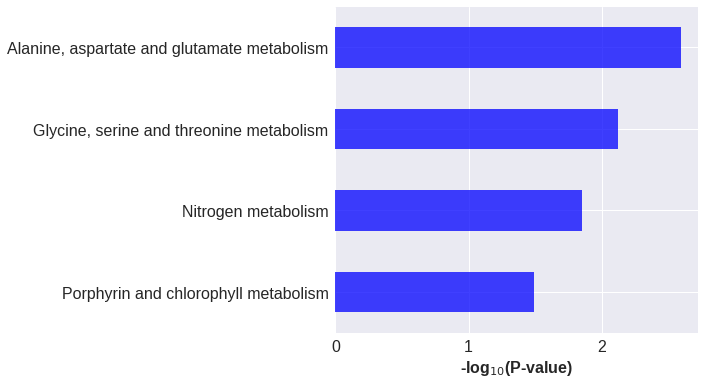

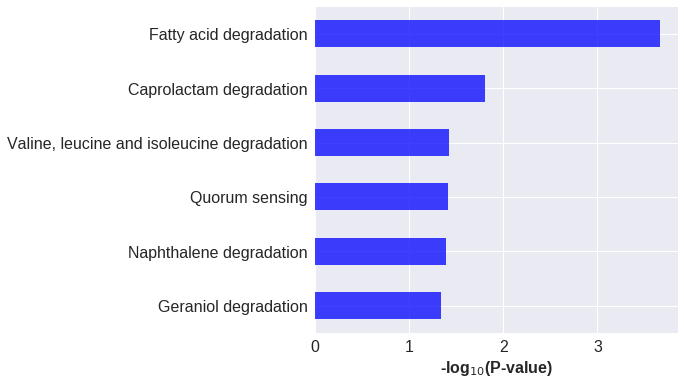

In [0]:
from gseapy.plot import barplot
#barplot(bin_outputs[0], column="P-value", color = "blue", cutoff=1)
barplot(bin_outputs[1], column="P-value", color = "blue", cutoff=.05)
#barplot(bin_outputs[2], column="P-value", color = "blue", cutoff=1)
#barplot(bin_outputs[3], column="P-value", color = "blue", cutoff=1)
#barplot(bin_outputs[4], column="P-value", color = "blue", cutoff=1)
barplot(output, column="P-value",color="blue",cutoff=.05)
